In [743]:
import json
import os
from IPython.display import Image, JSON, display

In [744]:
!ls

all_scores.json        figures			 montage.ipynb
cm1.ipynb	       flamegraph.pl		 montage_metrics.json
cm1_files.json	       flamegraphs		 montage_scores.json
cm1_metrics.json       gen_files.json		 requirements.txt
darshan.ipynb	       gen_scores.json		 scoring.ipynb
dask-playground.ipynb  genome.ipynb		 vani-cm1.ipynb
dask-worker-space      genome_metrics.json	 vani-demo.ipynb
digio-run.ipynb        genome_metrics_4096.json  vani-hacc.ipynb
digio.ipynb	       init.ipynb		 vani-playground.ipynb


In [745]:
import numpy as np
from json import JSONEncoder

class NpEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [747]:
depth = 5

def load_metrics(metrics_dir, fg_index):
    i = 0
    metrics = [0] * (depth + 1)
    metric_files = os.listdir(metrics_dir)
    metric_files.reverse()
#     for metric_file in os.listdir(metrics_dir):
#         if metric_file.startswith(f"metrics-{fg_index}"):
#             metrics_len = metrics_len + 1
    for metric_file in metric_files:
        if metric_file.startswith(f"metrics-{fg_index}"):
            print(metric_file, i)
            if fg_index == 'tmid':
                if metric_file.endswith(f"{i}.json"):
                    with open(f"{metrics_dir}/{metric_file}", "r") as file:
                        metrics[i] = json.load(file)
                    i = i + 1
                    if i > depth:
                        break
            else:
                with open(f"{metrics_dir}/{metric_file}", "r") as file:
                    metrics[i] = json.load(file)
    if fg_index == 'tmid':
        return metrics
#         return [item for sublist in metrics for item in sublist]
    return metrics[0]
#     return [item for sublist in metrics[0] for item in sublist]

def load_scores(score_dir, fg_index):
    
    scores = [0] * (depth + 1)
    score_files = os.listdir(score_dir)
#     score_files.reverse()
    i = len(score_files)
    for score_file in score_files:
        if score_file.startswith(f"scores-{fg_index}"):
            print(score_file, i)
            if fg_index == 'tmid':
                if score_file.endswith(f"{i}.json"):
                    with open(f"{score_dir}/{score_file}", "r") as file:
                        scores[i] = json.load(file)
                    i = i + 1
                    if i > depth:
                        break
            else:
                with open(f"{score_dir}/{score_file}", "r") as file:
                    scores[i] = json.load(file)
                        
#             with open(f"{score_dir}/{score_file}", "r") as file:
#                 scores[i] = json.load(file)
#             i = i + 1
#             if i > depth:
#                 break
    if fg_index == 'tmid':
        return scores
    return scores[0]


In [742]:
cm1_scores_tmid = load_scores("../vani/.digio/1668121029_cm1", 'tmid')
cm1_scores_proc_id = load_scores("../vani/.digio/1668121029_cm1", 'proc_id')
cm1_scores_file_id = load_scores("../vani/.digio/1668121029_cm1", 'file_id')


scores-tmid-74b3189e588fc74e05308e20ecca1710-10.json 32
scores-tmid-74b3189e588fc74e05308e20ecca1710-9.json 32
scores-tmid-74b3189e588fc74e05308e20ecca1710-8.json 32
scores-tmid-74b3189e588fc74e05308e20ecca1710-7.json 32
scores-tmid-74b3189e588fc74e05308e20ecca1710-6.json 32
scores-tmid-74b3189e588fc74e05308e20ecca1710-5.json 32
scores-tmid-74b3189e588fc74e05308e20ecca1710-4.json 32
scores-tmid-74b3189e588fc74e05308e20ecca1710-3.json 32
scores-tmid-74b3189e588fc74e05308e20ecca1710-2.json 32
scores-tmid-74b3189e588fc74e05308e20ecca1710-1.json 32
scores-tmid-74b3189e588fc74e05308e20ecca1710-0.json 32
scores-proc_id-9e9fcab30fa8077b509ff82a573107c1-0.json 32


IndexError: list assignment index out of range

In [750]:
cm1_metrics_tmid = load_metrics("../vani/.digio/1668121029_cm1", 'tmid')
cm1_metrics_proc_id = load_metrics("../vani/.digio/1668121029_cm1", 'proc_id')
cm1_metrics_file_id = load_metrics("../vani/.digio/1668384064", 'file_id')


metrics-tmid-0.json 0
metrics-tmid-1.json 1
metrics-tmid-2.json 2
metrics-tmid-3.json 3
metrics-tmid-4.json 4
metrics-tmid-5.json 5
metrics-proc_id.json 0
metrics-file_id.json 0


In [769]:
cm1_metrics_file_id[0]

{'start': -9210576409139474804,
 'stop': -9210576409139474804,
 'read': {'uniq_ranks': 0,
  'uniq_ranks_interval': '()',
  'agg_dur': 0.0,
  'total_io_size': 0,
  'uniq_filenames': 0,
  'uniq_filenames_interval': '()',
  'bw_sum': 0.0,
  'ops': 0,
  'time_interval': '()'},
 'write': {'uniq_ranks': 0,
  'uniq_ranks_interval': '()',
  'agg_dur': 0.0,
  'total_io_size': 0,
  'uniq_filenames': 0,
  'uniq_filenames_interval': '()',
  'bw_sum': 0.0,
  'ops': 0,
  'time_interval': '()'},
 'metadata': {'uniq_ranks': 1,
  'uniq_ranks_interval': '[5117778030848174740]',
  'agg_dur': 0.0006430000066757202,
  'uniq_filenames': 1,
  'uniq_filenames_interval': '[-9210576409139474804]',
  'ops': 1,
  'time_interval': '[488.5]'}}

In [751]:
def load_global_min_max(log_dir):
    with open(f"{log_dir}/global.json") as file:
        global_min_max = json.load(file)
        return global_min_max

def min_max(metric, global_min_max):
    # print("++min_max++")
    # print("metrics", metrics)
    # print("global_min_max", global_min_max)
    # print("metric", metric)
    # if hasattr(metric, "__len__"):
    #     metric = metric[0][0]
    time_start, time_end = tuple(global_min_max['tmid'])
#     print("time_start, time_end", time_start, time_end)
    bw = (metric['read']['bw_sum'] + metric['write']['bw_sum']) / 1024.0 / 1024.0
    size = (metric['read']['total_io_size'] + metric['write']['total_io_size']) / 1024.0 / 1024.0 / 1024.0
    uniq_files = max(max(metric['read']['uniq_filenames'], metric['write']['uniq_filenames']),
                     metric['metadata']['uniq_filenames'])
    uniq_ranks = max(max(metric['read']['uniq_ranks'], metric['write']['uniq_ranks']),
                     metric['metadata']['uniq_ranks'])
    return {
        'size': (0, size),
        'time': ((time_start * 1.0 / 1e7) / uniq_ranks, (time_end * 1.0 / 1e7) / uniq_ranks),
        'ops': (0, metric['read']['ops'] + metric['write']['ops'] + metric['metadata']['ops']),
        'files': (0, uniq_files),
        'bw': (0, bw),
        'parallelism': (0, uniq_ranks),
        'xfer': (0, 16)
    }

In [752]:
log_dir = "/p/gpfs1/iopp/recorder_app_logs/cm1/nodes-32/workflow-4/_parquet"

global_min_max = load_global_min_max(log_dir)

min_max_vals = min_max(cm1_metrics[0], global_min_max)

min_max_vals

{'size': (0, 21.17757113277912),
 'time': (0.0, 0.5221137496875),
 'ops': (0, 27463),
 'files': (0, 1547),
 'bw': (0, 6.582580448797671),
 'parallelism': (0, 1280),
 'xfer': (0, 16)}

In [701]:
import pandas as pd

cm1_metrics_tmid_df = pd.json_normalize(cm1_metrics_tmid)
cm1_metrics_proc_id_df = pd.json_normalize(cm1_metrics_proc_id)
cm1_metrics_file_id_df = pd.json_normalize(cm1_metrics_file_id)


In [753]:
def trans_obser(name, o):
    return f"{name}={o['label']} {o['value']:.5f}{o['unit']} {o['percentage']*100:.1f}%"
            
def trans_score(start, stop, s):
    obs=[]
    for o in s:        
        if isinstance(s[o], dict):
            obs.append(trans_obser(o, s[o]))
    obs.append(f"score={s['score']*100:.1f}%")
    ret = " | ".join(obs)
    return f"[{start}-{stop}] {ret}"


In [754]:
# print(len(cm1_metrics_file_id))
# print(len(cm1_scores_file_id))

# print(len(cm1_metrics_tmid))
# print(len(cm1_scores_tmid))

def convert_scores_to_hier(raw_scores, raw_metrics):
    scores_hier = [0] * len(raw_metrics)
    j = 0
    for i, metrics in enumerate(raw_metrics):
        scores = [0] * len(metrics)
        for m, metric in enumerate(metrics):
            scores[m] = raw_scores[j]
            j = j + 1
        scores_hier[i] = scores
    return scores_hier

# cm1_scores_proc_id_hier = convert_scores_to_hier(cm1_scores_proc_id, cm1_metrics_proc_id)
# cm1_scores_file_id_hier = convert_scores_to_hier(cm1_scores_file_id, cm1_metrics_file_id)

# print(cm1_metrics_proc_id[0][0])
# print(cm1_scores_proc_id_hier[0][0])   

# print(cm1_metrics_file_id[0][0])
# print(cm1_scores_file_id_hier[0][0])

# print(len(cm1_metrics_file_id[-1]))
# print(len(cm1_scores_file_id_hier[-30]))

In [755]:
cm1_scores_proc_id_hier = convert_scores_to_hier(cm1_scores_proc_id, cm1_metrics_proc_id)
cm1_scores_file_id_hier = convert_scores_to_hier(cm1_scores_file_id, cm1_metrics_file_id)


IndexError: list index out of range

In [756]:
from anytree import AnyNode, RenderTree

def convert_to_nodes(scores_hier, skip=0, depth=0):
    read_nodes = [0] * (len(scores_hier) - skip)
    write_nodes = [0] * (len(scores_hier) - skip)
    metadata_nodes = [0] * (len(scores_hier) - skip)
    
#     print(len(read_nodes))

    i = 0
    for s, scores in enumerate(scores_hier):
        
        if s < skip:            
            continue

        read_nodes[i] = [0] * len(scores)
        write_nodes[i] = [0] * len(scores)
        metadata_nodes[i] = [0] * len(scores)

        read_parent = None
        write_parent = None
        metadata_parent = None
        k = 0

        for j, score in enumerate(scores):

            start, stop = score['start'], score['stop']
            read_score, write_score, metadata_score = score['read'], score['write'], score['metadata']

            if i > 0 and j % 2 == 0:
                read_parent = read_nodes[i-1][k]
                write_parent = write_nodes[i-1][k]
                metadata_parent = metadata_nodes[i-1][k]
                k = k + 1

            read_nodes[i][j] = AnyNode(id=f"read-{start}-{stop}", parent=read_parent, start=start, stop=stop,
                                       score=read_score, trans=trans_score(start, stop, read_score))
            write_nodes[i][j] = AnyNode(id=f"write-{start}-{stop}", parent=write_parent, start=start, stop=stop,
                                        score=write_score, trans=trans_score(start, stop, write_score))
            metadata_nodes[i][j] = AnyNode(id=f"metadata-{start}-{stop}", parent=metadata_parent, start=start,
                                           stop=stop, score=metadata_score, trans=trans_score(start, stop, metadata_score))

        i = i + 1
            
        if depth > 0 and i > depth:
            break
            
    return read_nodes, write_nodes, metadata_nodes

def render_scores(fg_index, read_nodes, write_nodes, metadata_nodes, obs, percentage):
    
    read_node_root = AnyNode(id='read-root', children=[read_nodes[0][0]], trans='read')
    write_node_root = AnyNode(id='write-root', children=[write_nodes[0][0]], trans='write')
    metadata_node_root = AnyNode(id='metadata-root', children=[metadata_nodes[0][0]], trans='metadata')
    root = AnyNode(id='root', children=[read_node_root,write_node_root,metadata_node_root], trans='timeline')

#     def mysort(items):
#         print(items)
#         if len(items) == 3:
#             return items
#         return sorted(items, key=lambda item: item.score[obs]['percentage'], reverse=True)
    
    for pre, fill, node in RenderTree(root):
        
        if hasattr(node, 'score'):
            if obs in node.score and (node.score[obs]['percentage'] * 100) >= percentage:
                print("%s%s" % (pre, node.trans))
                if fg_index == 'tmid':
                    for i, metrics in enumerate(cm1_metrics_tmid):
                        for j, metric in enumerate(metrics):
                            if metric['start'] == node.start and metric['stop'] == node.stop:
                                grp = 'read'
                                if node.id.startswith('write'):
                                    grp = 'write'
                                elif node.id.startswith('metadata'):
                                    grp = 'metadata'
                                for attr in ['uniq_ranks', 'uniq_ranks_interval', 'uniq_filenames', 'uniq_filenames_interval']:
                                    print("%s%s=%s" % (fill, attr, metric[grp][attr]))
#                 elif fg_index == 'proc_id':
#                     for i, metrics in enumerate(cm1_metrics_proc_id_hier):
#                         for j, metric in enumerate(metrics):
#                             if metric['start'] == node.start and metric['stop'] == node.stop:
#                                 grp = 'read'
#                                 if node.id.startswith('write'):
#                                     grp = 'write'
#                                 elif node.id.startswith('metadata'):
#                                     grp = 'metadata'
#                                 for attr in ['uniq_ranks', 'uniq_ranks_interval', 'uniq_filenames', 'uniq_filenames_interval']:
#                                     print("%s%s=%s" % (fill, attr, metric[grp][attr]))
        else:
            print("%s%s" % (pre, node.trans))
    
#     print(RenderTree(root).by_attr('trans'))


### I/O Time (>30%)

#### Time-based

In [725]:
cm1_read_nodes_tmid, cm1_write_nodes_tmid, cm1_metadata_nodes_tmid = convert_to_nodes(cm1_scores_tmid)

render_scores('tmid', cm1_read_nodes_tmid, cm1_write_nodes_tmid, cm1_metadata_nodes_tmid, 'time', 30)

timeline
├── read
├── write
│   └── [0-6683056127] size=1 1.14632GB 5.4% | time=10 0.57940 111.0% | ops=1 2303.00000 8.4% | files=6 772.00000 49.9% | bw=9 1.11530MB/s 16.9% | parallelism=10 1.00000 0.1% | xfer=10 0.50970MB 3.2% | score=67.1%
│       uniq_ranks=1
│       uniq_ranks_interval=[5117778030848174740]
│       uniq_filenames=772
│       uniq_filenames_interval=[4531734244435428412,4531734248727221027]
│       ├── [0-3341528063] size=1 0.42935GB 2.0% | time=5 0.23367 44.8% | ops=1 1103.00000 4.0% | files=8 374.00000 24.2% | bw=10 0.48240MB/s 7.3% | parallelism=10 1.00000 0.1% | xfer=10 0.39860MB 2.5% | score=64.3%
│       │   uniq_ranks=1
│       │   uniq_ranks_interval=[5117778030848174740]
│       │   uniq_filenames=374
│       │   uniq_filenames_interval=[4531734244435428412,4531734248727221027]
│       └── [3341528064-6683056127] size=1 0.71697GB 3.4% | time=7 0.34573 66.2% | ops=1 1200.00000 4.4% | files=8 408.00000 26.4% | bw=10 0.63290MB/s 9.6% | parallelism=10 1.00000 0

#### Process-based

In [682]:
cm1_read_nodes_proc_id, cm1_write_nodes_proc_id, cm1_metadata_nodes_proc_id = convert_to_nodes(cm1_scores_proc_id_hier, skip=0, depth=10)

render_scores('proc_id', cm1_read_nodes_proc_id, cm1_write_nodes_proc_id, cm1_metadata_nodes_proc_id, 'time', 30)

timeline
├── read
├── write
│   └── [5117778030848174740-5117778030848240275] size=1 1.14632GB 5.4% | time=10 0.57940 111.0% | ops=1 2303.00000 8.4% | files=6 772.00000 49.9% | bw=10 1.11530MB/s 0.1% | parallelism=10 1.00000 0.1% | xfer=10 0.50970MB 3.2% | score=68.6%
│       ├── [5117778030848174740-5117778030848305811] size=1 1.14632GB 5.4% | time=10 0.57940 111.0% | ops=1 2303.00000 8.4% | files=6 772.00000 49.9% | bw=10 1.11530MB/s 0.1% | parallelism=10 1.00000 0.1% | xfer=10 0.50970MB 3.2% | score=68.6%
│       │   ├── [5117778030848174740-5117778030848436883] size=1 1.14632GB 5.4% | time=10 0.57940 111.0% | ops=1 2303.00000 8.4% | files=6 772.00000 49.9% | bw=10 1.11530MB/s 0.1% | parallelism=10 1.00000 0.1% | xfer=10 0.50970MB 3.2% | score=68.6%
│       │   │   ├── [5117778030848174740-5117778030848699027] size=1 1.14632GB 5.4% | time=10 0.57940 111.0% | ops=1 2303.00000 8.4% | files=6 772.00000 49.9% | bw=10 1.11530MB/s 0.1% | parallelism=10 1.00000 0.1% | xfer=10 0.50970MB 3.2

#### File-based

In [759]:
cm1_scores_file_id[0]

{'start': -9210576409139474804,
 'stop': -9168195151421661531,
 'read': {'size': {'label': 1, 'value': 0.0, 'unit': 'GB', 'percentage': 0.0},
  'time': {'label': 1, 'value': 0, 'unit': '', 'percentage': 0.0},
  'ops': {'label': 1, 'value': 0, 'unit': '', 'percentage': 0.0},
  'files': {'label': 10, 'value': 0, 'unit': '', 'percentage': 0.0},
  'bw': {'label': 10, 'value': 0.0, 'unit': 'MB/s', 'percentage': 0.0},
  'parallelism': {'label': 10, 'value': 0, 'unit': '', 'percentage': 0.0},
  'xfer': {'label': 10, 'value': 0, 'unit': 'MB', 'percentage': 0.0},
  'score': 0.6142857142857143},
 'write': {'size': {'label': 1, 'value': 0.0, 'unit': 'GB', 'percentage': 0.0},
  'time': {'label': 1, 'value': 0, 'unit': '', 'percentage': 0.0},
  'ops': {'label': 1, 'value': 0, 'unit': '', 'percentage': 0.0},
  'files': {'label': 10, 'value': 0, 'unit': '', 'percentage': 0.0},
  'bw': {'label': 10, 'value': 0.0, 'unit': 'MB/s', 'percentage': 0.0},
  'parallelism': {'label': 10, 'value': 0, 'unit': ''

In [763]:
# cm1_scores_file_id_hier2 = cm1_scores_file_id_hier
# cm1_scores_file_id_hier2.reverse()

cm1_read_nodes_file_id, cm1_write_nodes_file_id, cm1_metadata_nodes_file_id = convert_to_nodes([cm1_scores_file_id], skip=0, depth=5)

len(cm1_read_nodes_file_id[0])

3129

In [766]:

render_scores('file_id', cm1_read_nodes_file_id, cm1_write_nodes_file_id, cm1_metadata_nodes_file_id, 'time', -1)

timeline
├── read
│   └── [-9210576409139474804--9168195151421661531] size=1 0.00000GB 0.0% | time=1 0.00000 0.0% | ops=1 0.00000 0.0% | files=10 0.00000 0.0% | bw=10 0.00000MB/s 0.0% | parallelism=10 0.00000 0.0% | xfer=10 0.00000MB 0.0% | score=61.4%
├── write
│   └── [-9210576409139474804--9168195151421661531] size=1 0.00000GB 0.0% | time=1 0.00000 0.0% | ops=1 0.00000 0.0% | files=10 0.00000 0.0% | bw=10 0.00000MB/s 0.0% | parallelism=10 0.00000 0.0% | xfer=10 0.00000MB 0.0% | score=61.4%
└── metadata
    └── [-9210576409139474804--9168195151421661531] time=1 0.00064 0.1% | ops=1 1.00000 0.0% | files=10 1.00000 0.1% | parallelism=10 1.00000 0.1% | score=55.0%


### Bandwidth (>30%)

#### Time-based

In [669]:
cm1_read_nodes_tmid, cm1_write_nodes_tmid, cm1_metadata_nodes_tmid = convert_to_nodes(cm1_scores_tmid)

render_scores('tmid', cm1_read_nodes_tmid, cm1_write_nodes_tmid, cm1_metadata_nodes_tmid, 'bw', 30)

timeline
├── read
│   └── [0-6683056127] size=10 20.03125GB 94.6% | time=1 0.00000 0.0% | ops=1 1282.00000 4.7% | files=10 2.00000 0.1% | bw=2 5.46728MB/s 83.1% | parallelism=10 1280.00000 100.0% | xfer=1 16.00000MB 100.0% | score=50.0%
│       uniq_ranks=1280
│       uniq_ranks_interval=[5117778030848174740,5117778030931995284]
│       uniq_filenames=2
│       uniq_filenames_interval=[4531734244992817467] | [4531734245959907731]
│       ├── [0-3341528063] size=10 20.03125GB 94.6% | time=1 0.00000 0.0% | ops=1 1282.00000 4.7% | files=10 2.00000 0.1% | bw=2 5.46728MB/s 83.1% | parallelism=10 1280.00000 100.0% | xfer=1 16.00000MB 100.0% | score=50.0%
│       │   uniq_ranks=1280
│       │   uniq_ranks_interval=[5117778030848174740,5117778030931995284]
│       │   uniq_filenames=2
│       │   uniq_filenames_interval=[4531734244992817467] | [4531734245959907731]
│       │   ├── [0-1670764031] size=10 20.03125GB 94.6% | time=1 0.00000 0.0% | ops=1 1282.00000 4.7% | files=10 2.00000 0.1% | bw

#### Process-based

In [670]:
cm1_read_nodes_proc_id, cm1_write_nodes_proc_id, cm1_metadata_nodes_proc_id = convert_to_nodes(cm1_scores_proc_id_hier, skip=0, depth=10)

render_scores('proc_id', cm1_read_nodes_proc_id, cm1_write_nodes_proc_id, cm1_metadata_nodes_proc_id, 'bw', 30)

timeline
├── read
│       │   │   │   │   │   │   │   │   ├── [5117778030848174740-5117778030881729171] size=4 8.03125GB 37.9% | time=1 0.00003 0.0% | ops=1 514.00000 1.9% | files=10 2.00000 0.1% | bw=6 798.07963MB/s 40.3% | parallelism=2 512.00000 40.0% | xfer=1 16.00000MB 100.0% | score=35.7%
│       │   │   │   │   │   │   │   │   │   ├── [5117778030848174740-5117778030915283603] size=8 16.03125GB 75.7% | time=1 0.00003 0.0% | ops=1 1026.00000 3.7% | files=10 2.00000 0.1% | bw=2 1588.11621MB/s 80.2% | parallelism=5 1024.00000 80.0% | xfer=1 16.00000MB 100.0% | score=40.0%
│       │   │   │   │   │   │   │   │   └── [5117778030881729172-5117778030915283603] size=4 8.00000GB 37.8% | time=1 0.00003 0.0% | ops=1 512.00000 1.9% | files=10 1.00000 0.1% | bw=7 790.03658MB/s 39.9% | parallelism=2 512.00000 40.0% | xfer=1 16.00000MB 100.0% | score=37.1%
├── write
└── metadata


#### File-based

In [671]:
cm1_read_nodes_file_id, cm1_write_nodes_file_id, cm1_metadata_nodes_file_id = convert_to_nodes(cm1_scores_file_id_hier, skip=0, depth=10)

render_scores('file_id', cm1_read_nodes_file_id, cm1_write_nodes_file_id, cm1_metadata_nodes_file_id, 'bw', 30)

timeline
├── read
│       │   │   │   │   │   │   │   │   │   ├── [-9210576409139474804-4531734246940490828] size=10 20.03125GB 94.6% | time=1 0.00000 0.0% | ops=1 1282.00000 4.7% | files=10 2.00000 0.1% | bw=3 3.24548MB/s 74.4% | parallelism=10 1280.00000 100.0% | xfer=1 16.00000MB 100.0% | score=51.4%
│       │   │   │   │   │   │   │   │   └── [3397145568057025648-4531734246940490828] size=10 20.03125GB 94.6% | time=1 0.00000 0.0% | ops=1 1282.00000 4.7% | files=10 2.00000 0.1% | bw=3 3.24548MB/s 74.4% | parallelism=10 1280.00000 100.0% | xfer=1 16.00000MB 100.0% | score=51.4%
│       │   │   │   │   │   │       ├── [3397145568057025648-4531734245418630802] size=10 20.01562GB 94.5% | time=1 0.00000 0.0% | ops=1 1281.00000 4.7% | files=10 1.00000 0.1% | bw=3 3.23381MB/s 74.2% | parallelism=10 1280.00000 100.0% | xfer=1 16.00000MB 100.0% | score=51.4%
│       │   │   │   │       │   └── [4531734244708386771-4531734245418630802] size=10 20.01562GB 94.5% | time=1 0.00000 0.0% | ops=1 12

In [305]:
hacc_read_nodes, hacc_write_nodes, hacc_metadata_nodes = convert_to_nodes(hacc_scores)

render_scores(hacc_read_nodes, hacc_write_nodes, hacc_metadata_nodes)

timeline
├── read
│   └── [0-337020927] size=5 790.00000GB 50.0% | time=10 0.64205 2438.5% | ops=3 12800.00000 17.6% | files=6 1279.00000 49.9% | bw=7 27.86151MB/s 36.2% | parallelism=10 1280.00000 100.0% | xfer=1 63.20000MB 395.0% | score=60.0%
│       ├── [0-168510463] size=1 52.35938GB 3.3% | time=10 0.32624 1239.0% | ops=1 919.00000 1.3% | files=10 194.00000 7.6% | bw=10 1.61632MB/s 2.1% | parallelism=8 194.00000 15.2% | xfer=1 58.34168MB 364.6% | score=58.6%
│       │   ├── [0-84255231] size=1 0.39844GB 0.0% | time=4 0.00987 37.5% | ops=1 17.00000 0.0% | files=10 17.00000 0.7% | bw=10 0.04011MB/s 0.1% | parallelism=10 17.00000 1.3% | xfer=1 24.00000MB 150.0% | score=52.9%
│       │   └── [84255232-168510463] size=1 51.96094GB 3.3% | time=10 0.32537 1235.8% | ops=1 902.00000 1.2% | files=10 194.00000 7.6% | bw=10 1.57621MB/s 2.0% | parallelism=8 194.00000 15.2% | xfer=1 58.98891MB 368.7% | score=58.6%
│       └── [168510464-337020927] size=5 737.64062GB 46.7% | time=10 0.63211 2400

In [306]:
montage_read_nodes, montage_write_nodes, montage_metadata_nodes = convert_to_nodes(montage_scores)

render_scores(montage_read_nodes, montage_write_nodes, montage_metadata_nodes)

timeline
├── read
│   └── [0-1752591359] size=9 28.58594GB 83.6% | time=2 0.12653 14.7% | ops=9 3180300.00000 65.0% | files=2 1597.00000 86.1% | bw=3 2675.30679MB/s 71.6% | parallelism=7 178.00000 87.3% | xfer=10 0.00920MB 0.1% | score=60.0%
│       ├── [0-876295679] size=9 28.58594GB 83.6% | time=2 0.12653 14.7% | ops=9 3180300.00000 65.0% | files=2 1597.00000 86.1% | bw=3 2675.30679MB/s 71.6% | parallelism=7 178.00000 87.3% | xfer=10 0.00920MB 0.1% | score=60.0%
│       │   ├── [0-438147839] size=8 26.53391GB 77.6% | time=2 0.12443 14.5% | ops=9 3167516.00000 64.8% | files=2 1597.00000 86.1% | bw=4 2606.71389MB/s 69.8% | parallelism=7 178.00000 87.3% | xfer=10 0.00858MB 0.1% | score=60.0%
│       │   └── [438147840-876295679] size=1 2.05203GB 6.0% | time=5 0.37519 43.7% | ops=1 12784.00000 0.3% | files=10 1.00000 0.1% | bw=10 68.59290MB/s 1.8% | parallelism=10 1.00000 0.5% | xfer=10 0.16437MB 1.0% | score=67.1%
│       └── [876295680-1752591359] size=1 0.00000GB 0.0% | time=1 0.00000

In [123]:
from anytree import findall

# root.children[0].children[0].score['time']['label']

cm1_read_root = cm1_read_nodes[0][0]
cm1_write_root = cm1_write_nodes[0][0]
cm1_metadata_root = cm1_metadata_nodes[0][0]
hacc_read_root = hacc_read_nodes[0][0]
hacc_write_root = hacc_write_nodes[0][0]
hacc_metadata_root = hacc_metadata_nodes[0][0]
montage_read_root = montage_read_nodes[0][0]
montage_write_root = montage_write_nodes[0][0]
montage_metadata_root = montage_metadata_nodes[0][0]

def render_cross_nodes(root_nodes):
    for m in ['time', 'bw']:
    
        print("-" * 30)

        for app, root in zip(['cm1', 'hacc', 'montage'], root_nodes):

            nodes = findall(root, filter_=lambda n: hasattr(n, 'score') and m in n.score and n.score[m]['value'] > 0 and n.score[m]['label'] == 10)
    #         node_root = AnyNode(children=nodes, trans=f"{app}-{m}")
    #         print(RenderTree(node_root).by_attr('trans'))
            if nodes:
                print(f"{app}-{m}")
                nodes = list(set(nodes))
                nodes.sort(key=lambda n: n.start + n.stop)
    #             node_root = AnyNode(children=nodes, trans=f"{app}-{m}")
    #             print(RenderTree(node_root).by_attr('trans'))
                for node in nodes:
                    print(RenderTree(node).by_attr('trans'))


In [129]:
render_cross_nodes([cm1_read_root, hacc_read_root, montage_read_root])

------------------------------
hacc-time
[0-168510463] size=1 52.35938GB 3.3% | time=10 0.32624 1239.0% | ops=1 919.00000 1.3% | files=10 194.00000 7.6% | bw=10 1.61632MB/s 2.1% | parallelism=8 194.00000 15.2% | xfer=1 58.34168MB 364.6% | score=58.6%
├── [0-84255231] size=1 0.39844GB 0.0% | time=4 0.00987 37.5% | ops=1 17.00000 0.0% | files=10 17.00000 0.7% | bw=10 0.04011MB/s 0.1% | parallelism=10 17.00000 1.3% | xfer=1 24.00000MB 150.0% | score=52.9%
└── [84255232-168510463] size=1 51.96094GB 3.3% | time=10 0.32537 1235.8% | ops=1 902.00000 1.2% | files=10 194.00000 7.6% | bw=10 1.57621MB/s 2.0% | parallelism=8 194.00000 15.2% | xfer=1 58.98891MB 368.7% | score=58.6%
[84255232-168510463] size=1 51.96094GB 3.3% | time=10 0.32537 1235.8% | ops=1 902.00000 1.2% | files=10 194.00000 7.6% | bw=10 1.57621MB/s 2.0% | parallelism=8 194.00000 15.2% | xfer=1 58.98891MB 368.7% | score=58.6%
[0-337020927] size=5 790.00000GB 50.0% | time=10 0.64205 2438.5% | ops=3 12800.00000 17.6% | files=6 1279

In [127]:
render_cross_nodes([cm1_write_root, hacc_write_root, montage_write_root])

------------------------------
cm1-time
[0-6683056127] size=1 1.14632GB 5.4% | time=10 0.57940 111.0% | ops=1 2303.00000 8.4% | files=6 772.00000 49.9% | bw=10 1.11530MB/s 0.1% | parallelism=10 1.00000 0.1% | xfer=10 0.50970MB 3.2% | score=68.6%
├── [0-3341528063] size=1 0.42935GB 2.0% | time=5 0.23367 44.8% | ops=1 1103.00000 4.0% | files=8 374.00000 24.2% | bw=10 0.48240MB/s 0.0% | parallelism=10 1.00000 0.1% | xfer=10 0.39860MB 2.5% | score=64.3%
│   ├── [0-1670764031] size=1 0.28207GB 1.3% | time=3 0.13777 26.4% | ops=1 528.00000 1.9% | files=9 184.00000 11.9% | bw=10 0.25983MB/s 0.0% | parallelism=10 1.00000 0.1% | xfer=10 0.54704MB 3.4% | score=62.9%
│   └── [1670764032-3341528063] size=1 0.14728GB 0.7% | time=2 0.09590 18.4% | ops=1 575.00000 2.1% | files=9 200.00000 12.9% | bw=10 0.22256MB/s 0.0% | parallelism=10 1.00000 0.1% | xfer=10 0.26229MB 1.6% | score=61.4%
└── [3341528064-6683056127] size=1 0.71697GB 3.4% | time=7 0.34573 66.2% | ops=1 1200.00000 4.4% | files=8 408.0000

In [128]:
render_cross_nodes([cm1_metadata_root, hacc_metadata_root, montage_metadata_root])

------------------------------
cm1-time
[3341528064-6683056127] time=10 0.60209 115.3% | ops=8 9734.00000 35.4% | files=5 807.00000 52.2% | parallelism=10 32.00000 2.5% | score=82.5%
├── [3341528064-5012292095] time=7 0.35785 68.5% | ops=3 4930.00000 18.0% | files=8 417.00000 27.0% | parallelism=10 32.00000 2.5% | score=70.0%
└── [5012292096-6683056127] time=5 0.24423 46.8% | ops=3 4804.00000 17.5% | files=8 401.00000 25.9% | parallelism=10 32.00000 2.5% | score=65.0%
hacc-time
[0-84255231] time=10 2.14731 8155.5% | ops=3 14008.00000 19.2% | files=2 2281.00000 89.1% | parallelism=10 1280.00000 100.0% | score=62.5%
[0-168510463] time=10 3.24631 12329.4% | ops=8 25822.00000 35.4% | files=1 2560.00000 100.0% | parallelism=10 1280.00000 100.0% | score=72.5%
├── [0-84255231] time=10 2.14731 8155.5% | ops=3 14008.00000 19.2% | files=2 2281.00000 89.1% | parallelism=10 1280.00000 100.0% | score=62.5%
└── [84255232-168510463] time=10 1.10072 4180.5% | ops=3 11814.00000 16.2% | files=6 1277.000

In [192]:
import pandas as pd
from anytree import PreOrderIter

def metric_df(m):
    cols = ['size','time','ops','files','bw','parallelism','xfer']
    df = pd.DataFrame(columns=cols)

    for root in [cm1_read_root, cm1_write_root, cm1_metadata_root, 
                 hacc_read_root, hacc_write_root, hacc_metadata_root, 
                 montage_read_root, montage_write_root, montage_metadata_root]:
        for node in PreOrderIter(root):
            item = {}
            for col in cols:
                if col in node.score:
                    item[col] = float(node.score[col]['label'])
                else:
                    item[col] = 0.0
            if node.score[m]['label'] == 10:
                df = df.append(item, ignore_index=True)
    return df
                  
df = metric_df('time')

df

,size,time,ops,files,bw,parallelism,xfer
0,1.0,10.0,1.0,6.0,10.0,10.0,10.0
1,0.0,10.0,8.0,5.0,0.0,10.0,0.0
2,5.0,10.0,3.0,6.0,7.0,10.0,1.0
3,1.0,10.0,1.0,10.0,10.0,8.0,1.0
4,1.0,10.0,1.0,10.0,10.0,8.0,1.0
5,5.0,10.0,3.0,6.0,7.0,9.0,1.0
6,5.0,10.0,3.0,6.0,7.0,7.0,1.0
7,1.0,10.0,1.0,10.0,10.0,10.0,1.0
8,5.0,10.0,3.0,6.0,4.0,10.0,1.0
9,4.0,10.0,2.0,7.0,7.0,2.0,1.0


In [189]:
df.corr()

,size,time,ops,files,bw,parallelism,xfer
size,1.000000,NaN,-0.262091,0.133078,0.300279,-0.347036,0.012952
time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ops,-0.262091,NaN,1.000000,-0.818423,-0.821523,0.343476,-0.332465
files,0.133078,NaN,-0.818423,1.000000,0.851789,-0.303835,0.105686
bw,0.300279,NaN,-0.821523,0.851789,1.000000,-0.279460,0.416533
parallelism,-0.347036,NaN,0.343476,-0.303835,-0.279460,1.000000,0.066240
xfer,0.012952,NaN,-0.332465,0.105686,0.416533,0.066240,1.000000


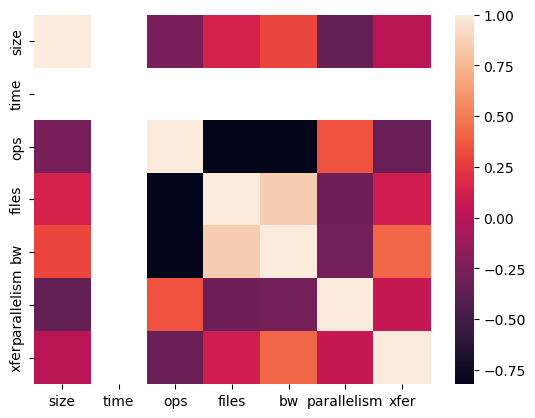

In [191]:
import seaborn as sns
sns.heatmap(df.corr())